In [5]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

# Stars néées en 1969

In [6]:
response = requests.get('http://localhost:8000/stars/by_birthyear/1969')
if response.status_code == 200:
    dfStarByBirthday = pd.DataFrame(response.json())
    dfStarByBirthday.set_index('id', inplace=True)
    print(dfStarByBirthday)
else:
    print('Error', response.status_code, response.json(), sep=', ')

                       name   birthdate
id                                     
479903  Aaron Michael Lacey  1969-01-01
72344       Abraham Benrubi  1969-01-01
542022         Alex Manette  1969-01-01
373312    Alexandra Hedison  1969-01-01
793         Alexis Arquette  1969-01-01
...                     ...         ...
551223     Vanessa Marshall  1969-01-01
873942         Verne Troyer  1969-01-01
890075       Victor Varnado  1969-01-01
422639          Wenli Jiang  1969-01-01
365445          Wood Harris  1969-01-01

[126 rows x 2 columns]


# Film dont le titre contient 'Excuse'

In [7]:
response = requests.get('http://localhost:8000/movies/by_title_part?t=Excuse')
if response.status_code == 200:
    dfMovieByPartTitle = pd.DataFrame(response.json())
    dfMovieByPartTitle.set_index('id', inplace=True)
    print(dfMovieByPartTitle)
else:
    print('Error', response.status_code, response.json(), sep=', ')

          title  year  duration
id                             
5257  Excuse Me  1915        50


# Nombre de films par acteur

In [8]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_actor')
if response.status_code == 200:
    dfStatActor = pd.DataFrame(response.json())
    dfStatActor.columns=["Acteur","Nombre de films"]
    print(dfStatActor)
else:
    print('Error', response.status_code, response.json(), sep=', ')

                                                Acteur  Nombre de films
0    {'birthdate': '1907-05-26', 'name': 'John Wayn...              172
1    {'birthdate': '1884-03-16', 'name': 'Harrison ...               86
2    {'birthdate': '1930-08-25', 'name': 'Sean Conn...               73
3    {'birthdate': '1946-07-06', 'name': 'Sylvester...               73
4    {'birthdate': '1956-07-09', 'name': 'Tom Hanks...               69
..                                                 ...              ...
161  {'birthdate': '1939-01-01', 'name': 'Patrick W...               10
162  {'birthdate': '1946-01-01', 'name': 'Frank Wel...               10
163  {'birthdate': '1905-01-01', 'name': 'Grant Wit...               10
164  {'birthdate': '1977-01-01', 'name': 'Michael F...               10
165  {'birthdate': None, 'name': 'Joseph Oliveira',...               10

[166 rows x 2 columns]


# Film par année

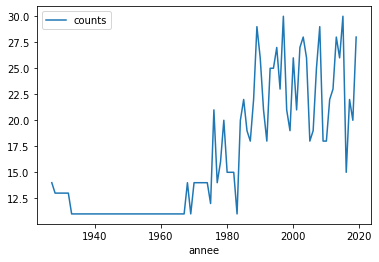

In [9]:
dfStatMovieByYear = pd.read_json("http://localhost:8000/movies/count_by_year")
dfStatMovieByYear.columns=['annee','counts']
dfStatMovieByYearGraph = dfStatMovieByYear[dfStatMovieByYear.counts > 10].set_index('annee')
dfStatMovieByYearGraph.plot()

# Stars nées par année

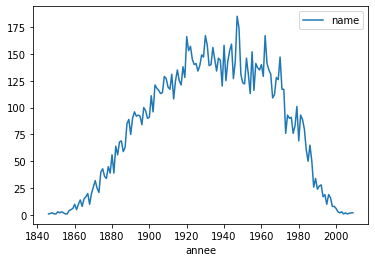

In [10]:
dfStars = pd.read_json("http://localhost:8000/stars",convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars['annee'] = dfStars.birthdate.dt.year
dfCountStarByYear = dfStars[['annee','name']].groupby(['annee']).count()
dfCountStarByYear.plot()

# Top 10 acteurs

In [11]:
response = requests.get("http://localhost:8000/stars/stats2_movie_by_actor?minc=30")
data_json = response.json()
my_response = [ { "Acteur" : d[0]['name'],
               "movie_count":d[1],
               "first_movie":d[2],
               "last_movie":d[3] } for d in data_json]
dfActors = pd.DataFrame(my_response)
dfTop10Actors = dfActors[:10]
dfTop10Actors

,Acteur,movie_count,first_movie,last_movie
0,John Wayne,172,1926,1976
1,Harrison Ford,86,1915,1932
2,Sylvester Stallone,73,1969,2019
3,Sean Connery,73,1954,2012
4,Tom Hanks,69,1980,2020
5,Jean-Claude Van Damme,66,1979,2019
6,Clint Eastwood,63,1955,2018
7,Harrison Ford,63,1966,2020
8,Arnold Schwarzenegger,56,1970,2019
9,Will Smith,50,1988,2020


NameError: name 'dfTop10ActorsMovieCount' is not defined

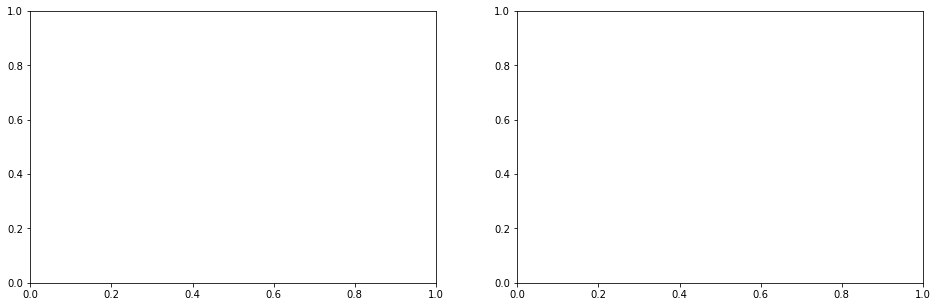

In [12]:
dfTop10ActorsCountMovie = dfTop10Actors[['Acteur', 'movie_count']].set_index('Acteur')
dfTop10ActorsYears = dfTop10Actors[['Acteur', 'first_movie', 'last_movie']].set_index('Acteur')
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

dfTop10ActorsCountMovie.plot(kind="bar", ax=ax1)
ax1.set_title("Nombre de films par acteur")
ax1.set_ylabel("movie_count")
ax1.set_xlabel("Acteurs du top 10")

dfTop10ActorsYears.plot(kind="bar", ax=ax2)
ax2.set_title("Premier/Dernier film des acteurs")
ax2.set_ylabel("Année film")
ax2.set_xlabel("Top 10 Acteur")
ax2.set_ylim(1900, 2025)